In [1]:
#First let's import the necessary libraries.
%matplotlib inline
from Compare import Compare # The Compare class
import os #file operations
from collections import defaultdict #complex dictionaries
import matplotlib.pyplot as plt #plotting library
from mpl_toolkits.mplot3d import Axes3D #for 3d graphs
import copy #need deepcopy() for working with the dictionaries.
import pandas as pd

####   Uncomment the items below if you want 
####   to use D3 for output.

#import mpld3
#mpld3.enable_notebook()

In [3]:
# The output below takes the derivative files from the folder " ALL/" and puts them into a python dictionary (array)
# for later use.  I have included two of these. One including the Heritage Community Foundation's collection and one
# not.

path = "ALL/"

def processCollection (path):
    #initialise vars:
    urls = []
    #establish the data folder
    for filename in os.listdir(path):
        with open(path+filename, "r") as file:
            print (filename) #see the filenames available.
            urls.append(list({(filename[0:15], line.translate(str.maketrans(')'," ")).split(",")[0][2:6], line.translate(str.maketrans(')'," ")).split(",")[1].strip()) for line in file.readlines()}))
    return(urls)

#newdict = defaultdict(dict)
newdict = defaultdict(lambda: defaultdict(list))
newdict2 = defaultdict(lambda: defaultdict(list))
PC = processCollection(path)
#print(list(zip(PC[0])))
#print(list(zip(PC[0][0])))
#print (**collect)
for collect in PC:
    for coll, date, url in collect:
        newdict[date][coll].append(url)

#newdict2 eliminates collections in if-then statement.
for collect in PC:
    for coll, date, url in collect:
        if coll == 'ALBERTA_heritag' or coll == 'ALBERTA_hcf_onl' or coll=="DUMMY_MEDIA" or coll=="DUMMY_GOVERNMEN" or coll== "DUMMY_ORGANIZAT" or coll== "DUMMY_OVERALL" or coll== "DUMMY_TECHNOLOG" or coll== "DUMMY_SOCIALMED":
            pass
        else:
            newdict2[date][coll].append(url)

# newdict will provide all the data like so:

#{'DATE': {'COLLECTION': ['url1.com', 'url2.com', 'etc']}}
#

UVIC_Digital_Scholarship_Websites-urls.txt
UVIC_trans_web-urls.txt
ALBERTA_fort_mcmurray_wildfire_2016-urls.txt
ALBERTA_canadian_business_grey_literature-all.txt
WAHR_exln42-all.txt
ALBERTA_oil_sands-all.txt
ALBERTA_humanities_computing-all.txt
ALBERTA_heritage_community_foundation-all.txt
UVIC_Research_Centres_Groups_and_Corporate_Entities-urls.txt
WAHR_panamapapers-urls.txt
UVIC_anarchist_archives-urls.txt
ALBERTA_western_canadian_film-urls.txt
UVIC_environmental_organizations_and_resources_of_bc-urls.txt
ALBERTA_government_information_all_urls.txt
DUMMY_OVERALL
UVIC_bc_teachers_labour_dispute_2014-urls.txt
UVIC_Faculty_Association_Certification_2014-urls.txt
ALBERTA_ottawa_shooting_october_2014-urls.txt
WAHR_ymmfire-urls.txt
UVIC_Websites-urls.txt
ALBERTA_hcf_online_encyclopedia-all.txt
ALBERTA_education_curriculum-all.txt
ALBERTA_edmonton_public_library-urls.txt
DUMMY_GOVERNMENT
ALBERTA_energy_environment-all.txt
TORONTO_panam
ALBERTA_floods_2013-all.txt
ALBERTA_university_of_websi

In [3]:
def convert_full_urls (path):
    collection = dict()
    for filename in os.listdir(path):
        with open(path+filename, "r") as file:
            print(filename)
        #split the data by comma and lose the closing url. Put it in a set to remove duplicates.
            collect = {line.translate(str.maketrans(')'," ")).split(",")[1].strip() for line in file.readlines()}
            #print(collect)
        # result:  {'www.url1.suf', 'www.biglovely.url2.suf', 'education.url3.suf'}
            collect2 = [x.split(".")[-2]+"."+x.split(".")[-1] for x in collect]
            collection[filename[0:15]] = (collect2) #convert collect2 to a dict {truncatedFILENAME: [url1.suf, url2.suf, url3.suf]}
    return (collection)
            
def convert_subdomain_urls (path):
    collection = dict()
    for filename in os.listdir(path):
        with open(path+filename, "r") as file:
            print(filename)
        #split the data by comma and lose the closing url. Put it in a set to remove duplicates.
            collect = {line.translate(str.maketrans(')'," ")).split(",")[1].strip() for line in file.readlines()}
            collect4 = [x for x in collect]
        # result merely converts each set to a big list of urls. (Full scope of analysis)
            collection[filename[0:15]] = (collect4) #convert collect4 to a dict.
    return(collection)

def removekey(d, key):
    r = dict(d)
    del r[key]
    return r

convert = convert_full_urls("ALL/")

comparit = [x for x in convert.values()]
names = [x.upper() for x in convert.keys()]    

    

UVIC_Digital_Scholarship_Websites-urls.txt
UVIC_trans_web-urls.txt
ALBERTA_fort_mcmurray_wildfire_2016-urls.txt
ALBERTA_canadian_business_grey_literature-all.txt
WAHR_exln42-all.txt
ALBERTA_oil_sands-all.txt
ALBERTA_humanities_computing-all.txt
ALBERTA_heritage_community_foundation-all.txt
UVIC_Research_Centres_Groups_and_Corporate_Entities-urls.txt
WAHR_panamapapers-urls.txt
UVIC_anarchist_archives-urls.txt
ALBERTA_western_canadian_film-urls.txt
UVIC_environmental_organizations_and_resources_of_bc-urls.txt
ALBERTA_government_information_all_urls.txt
DUMMY_OVERALL
UVIC_bc_teachers_labour_dispute_2014-urls.txt
UVIC_Faculty_Association_Certification_2014-urls.txt
ALBERTA_ottawa_shooting_october_2014-urls.txt
WAHR_ymmfire-urls.txt
UVIC_Websites-urls.txt
ALBERTA_hcf_online_encyclopedia-all.txt
ALBERTA_education_curriculum-all.txt
ALBERTA_edmonton_public_library-urls.txt
DUMMY_GOVERNMENT
ALBERTA_energy_environment-all.txt
TORONTO_panam
ALBERTA_floods_2013-all.txt
ALBERTA_university_of_websi

['ALBERTA_edmonto', 'TORONTO_tspace-', 'ALBERTA_educati', 'DUMMY_ORGANIZAT', 'ALBERTA_humanit', 'UVIC_anarchist_', 'ALBERTA_heritag', 'DUMMY_TECHNOLOG', 'ALBERTA_prairie', 'ALBERTA_ottawa_', 'UVIC_at_risk_we', 'UVIC_Research_C', 'TORONTO_panam', 'ALBERTA_fort_mc', 'UVIC_Government', 'DUMMY_SOCIALMED', 'UVIC_50thAnnive', 'UVIC_News-urls.', 'DUMMY_MEDIA', 'DUMMY_OVERALL', 'ALBERTA_western', 'ALBERTA_web_arc', 'UVIC_bc_teacher', 'UVIC_environmen', 'DUMMY_GOVERNMEN', 'WAHR_ymmfire-ur', 'WAHR_panamapape', 'UVIC_trans_web-', 'UVIC_Websites-u', 'UVIC_Calendar', 'UVIC_Digital_Sc', 'WAHR_exln42-all', 'ALBERTA_oil_san', 'ALBERTA_energy_', 'ALBERTA_health_', 'ALBERTA_hcf_onl', 'ALBERTA_canadia', 'UVIC_Faculty_As', 'ALBERTA_univers', 'ALBERTA_lfranco', 'TORONTO_snowden', 'ALBERTA_idle_no', 'ALBERTA_governm', 'ALBERTA_floods_']
[ 0.37253201  0.24362861  0.14236412  0.10702152  0.09076558  0.08344085
  0.07649092  0.07555301  0.06629343  0.06246751  0.05944316  0.05655186
  0.0541493   0.04985318  0

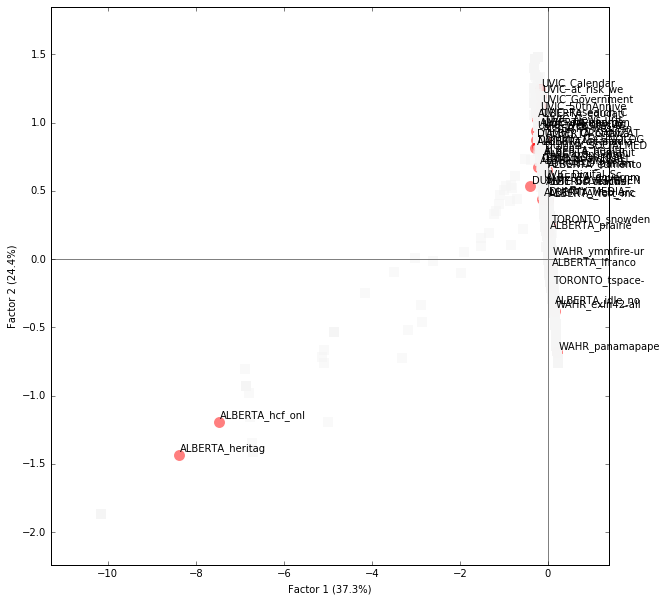

Empty DataFrame
Columns: [ALBERTA_edmonto, TORONTO_tspace-, ALBERTA_educati, DUMMY_ORGANIZAT, ALBERTA_humanit, UVIC_anarchist_, ALBERTA_heritag, DUMMY_TECHNOLOG, ALBERTA_prairie, ALBERTA_ottawa_, UVIC_at_risk_we, UVIC_Research_C, TORONTO_panam, ALBERTA_fort_mc, UVIC_Government, DUMMY_SOCIALMED, UVIC_50thAnnive, UVIC_News-urls., DUMMY_MEDIA, DUMMY_OVERALL, ALBERTA_western, ALBERTA_web_arc, UVIC_bc_teacher, UVIC_environmen, DUMMY_GOVERNMEN, WAHR_ymmfire-ur, WAHR_panamapape, UVIC_trans_web-, UVIC_Websites-u, UVIC_Calendar, UVIC_Digital_Sc, WAHR_exln42-all, ALBERTA_oil_san, ALBERTA_energy_, ALBERTA_health_, ALBERTA_hcf_onl, ALBERTA_canadia, UVIC_Faculty_As, ALBERTA_univers, ALBERTA_lfranco, TORONTO_snowden, ALBERTA_idle_no, ALBERTA_governm, ALBERTA_floods_]
Index: []

[0 rows x 44 columns]


In [7]:
#print(convert.keys())
#print(convert['TORONTO_snowden'])


dummy = Compare(convert)
print(dummy.response.loc[dummy.response.sum(axis=1) > dummy.response.shape[1] -1,])

To create a dummy, we need to know what websites are most commonly.

In [11]:
#Prints a set of tuples with (number of collection matches proposed, number of actual matches)
# (i.e. 24, 2) means there are 2 websites that match 24 collections.
dum = [(dummy.response.shape[1]-x, dummy.response.loc[dummy.response.sum(axis=1) > dummy.response.shape[1] -x,].shape[0]) for x in range(dummy.response.shape[1])]
dummy.response.loc[dummy.response.sum(axis=1) > dummy.response.shape[1] -30,].to_csv("DUMMY_ALL.csv")
print(dum)

[(44, 0), (43, 0), (42, 0), (41, 0), (40, 0), (39, 0), (38, 0), (37, 0), (36, 0), (35, 0), (34, 1), (33, 2), (32, 3), (31, 7), (30, 7), (29, 7), (28, 8), (27, 13), (26, 16), (25, 18), (24, 26), (23, 32), (22, 36), (21, 38), (20, 42), (19, 49), (18, 55), (17, 69), (16, 80), (15, 92), (14, 111), (13, 129), (12, 156), (11, 199), (10, 244), (9, 244), (8, 244), (7, 316), (6, 416), (5, 571), (4, 881), (3, 1429), (2, 2717), (1, 7325)]


In [4]:
## Produce a dictionary output that creates a list of outputs suitable for analysis by date.
##
## collection_var[-1] would analyze all the links together until the latest year (2016). collection_var[-2]
## would analyze everything up to t-1 (2015).
##
## Our hope for the future is that the data could be used in an animation, showing changes over time. But for now, 
## we will just show the progress.

def add_two_collections (col1, col2):
    # This takes two collections and combines them into one.
    col_1 = col1.copy()
    for coll, values in col2.items():
        #print(values)
        try:
            col_1[coll] = set(col_1[coll])
            col_1[coll].update(set(values)) 
            col_1[coll] = list(col_1[coll])
        except KeyError:
            col_1[coll] = list(values)       
    return col_1

def reduce_collections (dictionary):
    dict_list = []
    fulllist = {}
    dict2 = copy.deepcopy(dictionary)
    for x, y in sorted(dict2.items()):
        #print(x)
        n = dictionary.pop(x)
        if len(dict_list) < 1:
            dict_list.append(n)
        #print(n)
        else:
            dict_list.append((add_two_collections(dict_list[-1], n)))
        #print(dict_list)
    return(dict_list)

collection_var = reduce_collections (copy.deepcopy(newdict2))

# Collection var is a list of dictionaries starting from the earliest to the latest. The later dictionaries
# are accumulations of the former.

['ALBERTA_western', 'UVIC_50thAnnive', 'UVIC_Government', 'TORONTO_snowden', 'ALBERTA_edmonto', 'TORONTO_tspace-', 'ALBERTA_educati', 'ALBERTA_humanit', 'ALBERTA_web_arc', 'UVIC_bc_teacher', 'UVIC_Faculty_As', 'ALBERTA_health_', 'ALBERTA_fort_mc', 'UVIC_environmen', 'ALBERTA_prairie', 'WAHR_ymmfire-ur', 'WAHR_panamapape', 'UVIC_trans_web-', 'UVIC_Websites-u', 'UVIC_Calendar', 'ALBERTA_ottawa_', 'UVIC_at_risk_we', 'WAHR_exln42-all', 'ALBERTA_oil_san', 'UVIC_Research_C', 'UVIC_News-urls.', 'ALBERTA_energy_', 'TORONTO_panam', 'ALBERTA_canadia', 'UVIC_Digital_Sc', 'UVIC_anarchist_', 'ALBERTA_univers', 'ALBERTA_lfranco', 'ALBERTA_idle_no', 'ALBERTA_governm', 'ALBERTA_floods_']
[ 0.33083594  0.15839052  0.12393764  0.10975845  0.10566302  0.09170531
  0.08425702  0.08202609  0.07613285  0.07163024  0.06901112  0.0653676
  0.06457207  0.06096815  0.05477369  0.05076281  0.04551892  0.0435587
  0.04032817  0.03900554  0.03888603  0.03610809  0.03388558  0.03280478
  0.03105121  0.03007958  0.0

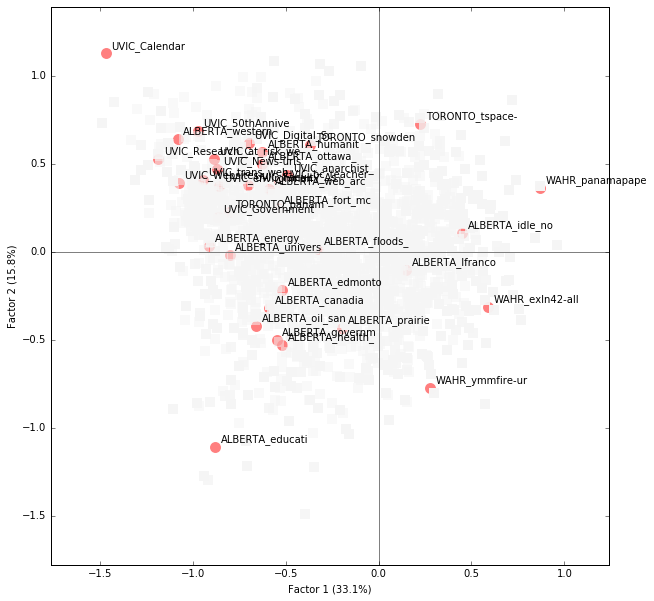

In [6]:
#for i in ["DUMMY_OVERALL", "DUMMY_GOVERNMEN", "DUMMY_ORGANIZAT", "DUMMY_MEDIA", "DUMMY_TECHNOLOG", "DUMMY_SOCIALMED"]:
 #   del(collection_var[-1][i])
    
dummy = Compare(collection_var[-1])


['ALBERTA_health_', 'ALBERTA_univers', 'ALBERTA_prairie', 'ALBERTA_educati', 'ALBERTA_governm', 'ALBERTA_web_arc']
[ 0.249456    0.14206412  0.11168713  0.09933138  0.00521456]


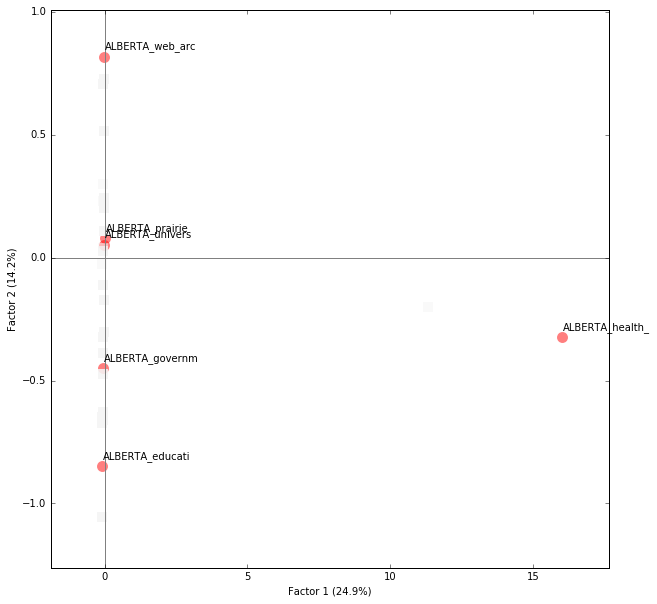

In [5]:
dummy = Compare(collection_var[2])

In [8]:
print(dummy.response.shape[1])
print(dummy.response.loc[dummy.response.sum(axis=1) > dummy.response.shape[1] -3],)

6
                              ALBERTA_educati ALBERTA_health_ ALBERTA_prairie  \
alberta.ca                               True           False            True   
beacon-1.newrelic.com                   False           False            True   
dublincore.org                           True           False            True   
education.alberta.ca                     True           False            True   
get.adobe.com                           False           False            True   
gmpg.org                                 True           False            True   
maps.google.ca                          False           False            True   
purl.org                                 True           False            True   
qtinstall.apple.com                      True           False            True   
twitter.com                             False           False            True   
web.resource.org                        False           False            True   
wellformedweb.org         

['ALBERTA_energy_', 'ALBERTA_educati', 'ALBERTA_floods_', 'ALBERTA_web_arc', 'ALBERTA_idle_no', 'ALBERTA_lfranco', 'ALBERTA_prairie', 'ALBERTA_governm', 'ALBERTA_univers', 'ALBERTA_health_', 'ALBERTA_humanit', 'ALBERTA_canadia']
[ 0.20661669  0.14787258  0.10259907  0.0983376   0.07951743  0.07170116
  0.06696443  0.05667049  0.04106123  0.02197096  0.01334465]


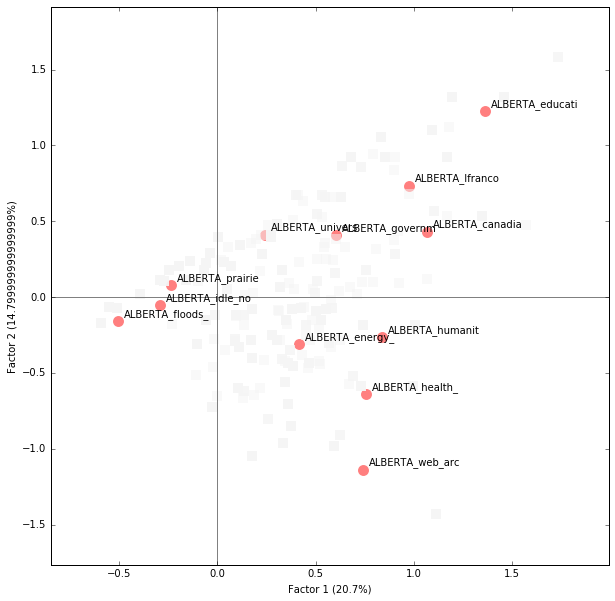

In [10]:
dummy = Compare(collection_var[3])

['ALBERTA_energy_', 'ALBERTA_ottawa_', 'UVIC_trans_web-', 'ALBERTA_floods_', 'ALBERTA_prairie', 'ALBERTA_idle_no', 'ALBERTA_lfranco', 'ALBERTA_governm', 'UVIC_Calendar', 'UVIC_Faculty_As', 'UVIC_News-urls.', 'ALBERTA_health_', 'ALBERTA_oil_san', 'ALBERTA_humanit', 'UVIC_anarchist_', 'ALBERTA_canadia', 'UVIC_bc_teacher', 'ALBERTA_educati', 'UVIC_Government', 'ALBERTA_web_arc', 'UVIC_environmen', 'ALBERTA_univers', 'UVIC_Digital_Sc', 'UVIC_50thAnnive', 'UVIC_Research_C']
[ 0.19421078  0.16399597  0.12954869  0.11905092  0.11294243  0.10441899
  0.10125638  0.09272272  0.08480326  0.07960364  0.0736015   0.06132014
  0.0599875   0.05667189  0.05242626  0.04888639  0.04838354  0.0426811
  0.03805987  0.03530084  0.03174379  0.02517414  0.02510988  0.02157514]


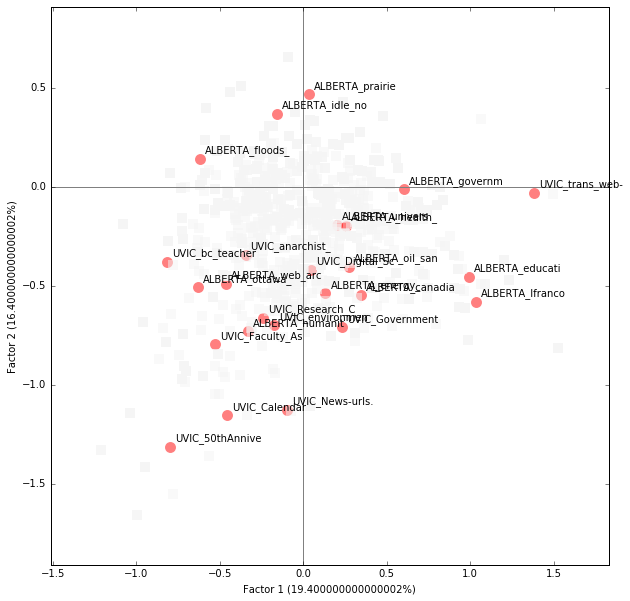

In [11]:
dummy = Compare(collection_var[4])

In [ ]:
dummy = Compare(collection_var[5])
print(dummy.response.loc[dummy.response.sum(axis=1) > dummy.response.shape[1] -3],)

['ALBERTA_floods_', 'UVIC_Government', 'UVIC_Research_C', 'ALBERTA_humanit', 'TORONTO_tspace-', 'UVIC_anarchist_', 'UVIC_Faculty_As', 'TORONTO_panam', 'UVIC_environmen', 'ALBERTA_ottawa_', 'ALBERTA_idle_no', 'ALBERTA_health_', 'UVIC_Websites-u', 'ALBERTA_prairie', 'UVIC_News-urls.', 'UVIC_50thAnnive', 'ALBERTA_oil_san', 'UVIC_at_risk_we', 'ALBERTA_edmonto', 'ALBERTA_web_arc', 'ALBERTA_governm', 'UVIC_trans_web-', 'UVIC_Calendar', 'ALBERTA_lfranco', 'UVIC_Digital_Sc', 'ALBERTA_energy_', 'TORONTO_snowden', 'ALBERTA_educati', 'ALBERTA_canadia', 'UVIC_bc_teacher', 'ALBERTA_univers']
[ 0.22243157  0.14967708  0.1188466   0.09712853  0.09248918  0.08288158
  0.08035287  0.07976514  0.07188432  0.06962454  0.06357743  0.05467817
  0.05239961  0.05083409  0.04665517  0.04561294  0.03711251  0.03532686
  0.03274623  0.03064135  0.02918436  0.02826745  0.02626059  0.02340818
  0.02302607  0.02151013  0.02017646  0.0144024   0.00995374  0.00271754]


In [ ]:
dummy = Compare(collection_var[6])

In [2]:
print(dummy.response.loc[dummy.response.sum(axis=1) > dummy.response.shape[1] -14,][0:4])

NameError: name 'dummy' is not defined

In [ ]:
#def unionize (sets_list):
    return set().union(*sets_list)

#d=[]
#collections = [x for x in collection_var[6].values()]
#dd = unionize(collections)

#for y in collections:
#    d.append({x: x in y for x in dd})

#print(collection_var[6].keys())
#dummy = Compare(collection_var[6])
#df = pd.DataFrame(d, index=[[x for x in collection_var[6].keys()]]) 
#print(df.T)

['ALBERTA_health_', 'TORONTO_panam', 'WAHR_exln42-all', 'ALBERTA_educati', 'UVIC_bc_teacher', 'UVIC_Websites-u', 'ALBERTA_floods_', 'WAHR_ymmfire-ur', 'ALBERTA_web_arc', 'ALBERTA_energy_', 'ALBERTA_western', 'UVIC_at_risk_we', 'UVIC_Calendar', 'ALBERTA_idle_no', 'UVIC_environmen', 'ALBERTA_canadia', 'UVIC_50thAnnive', 'ALBERTA_ottawa_', 'ALBERTA_prairie', 'ALBERTA_univers', 'TORONTO_tspace-', 'ALBERTA_humanit', 'UVIC_Digital_Sc', 'UVIC_Government', 'WAHR_panamapape', 'ALBERTA_fort_mc', 'UVIC_anarchist_', 'ALBERTA_oil_san', 'UVIC_News-urls.', 'ALBERTA_lfranco', 'ALBERTA_governm', 'TORONTO_snowden', 'UVIC_Research_C', 'ALBERTA_edmonto', 'UVIC_Faculty_As', 'UVIC_trans_web-']
[ 0.33083594  0.15839052  0.12393764  0.10975845  0.10566302  0.09170531
  0.08425702  0.08202609  0.07613285  0.07163024  0.06901112  0.0653676
  0.06457207  0.06096815  0.05477369  0.05076281  0.04551892  0.0435587
  0.04032817  0.03900554  0.03888603  0.03610809  0.03388558  0.03280478
  0.03105121  0.03007958  0.0

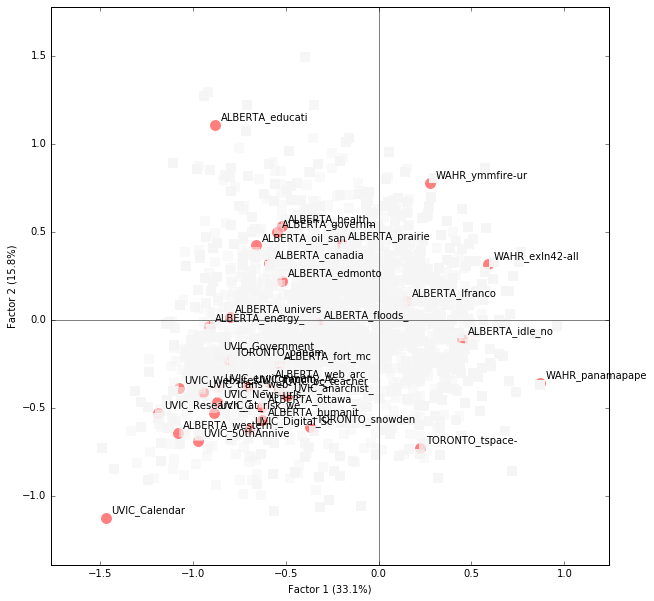

In [9]:
dummy = Compare(collection_var[6])